[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\marsh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\marsh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\marsh\anaconda3\Lib\site-packages\sklearn\metri

Accuracy: 0.0000

Classification Report:
              precision    recall  f1-score   support

         Ham       0.00      0.00      0.00       1.0
        Spam       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



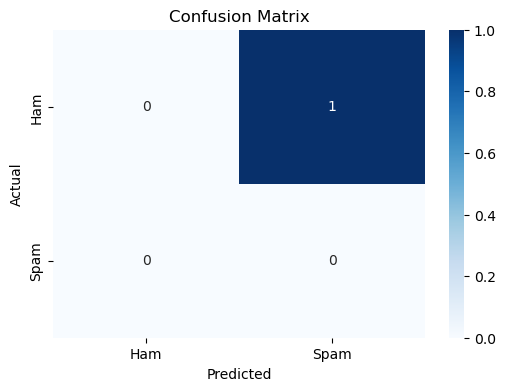


New email: Win a free vacation! Click to claim now!
Prediction: Ham


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt')
nltk.download('stopwords')

try:
    df = pd.read_csv('spam_email_dataset.csv')
except FileNotFoundError:
    data = {
        'text': [
            'Win a free iPhone now! Click here!',
            'Meeting scheduled for tomorrow at 10 AM.',
            'Claim your prize before it expires!',
            'Please review the attached document.',
            'Urgent: Your account needs verification!'
        ],
        'label': ['spam', 'ham', 'spam', 'ham', 'spam']
    }
    df = pd.DataFrame(data)

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['cleaned_text'] = df['text'].apply(preprocess_text)
df['label_encoded'] = df['label'].map({'spam': 1, 'ham': 0})

X = df['cleaned_text']
y = df['label_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

def predict_email(email_text):
    cleaned_email = preprocess_text(email_text)
    email_tfidf = vectorizer.transform([cleaned_email])
    prediction = model.predict(email_tfidf)
    return 'Ham' if prediction[0] == 1 else 'am'

new_email = "Win a free vacation! Click to claim now!"
result = predict_email(new_email)
print(f"\nNew email: {new_email}")
print(f"Prediction: {result}")